# Abstract

In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.
The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

Submission File: For every row in the test.csv, submission files should contain two columns: ID and target. The ID corresponds to the column of that ID in the test.csv.
For the prediction of the Target column used LightGBM and XGboost and at the end combined the predictions of both the libraries and generated the sub_lgb_xgb.csv file as the output.

Importing the libraries of pandas and lightgbm. Loading the train.csv and test.csv files.

In [2]:
import pandas as pd
import lightgbm as lgb
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Retreiving the first five rows of train dataframe

![](http://)

In [3]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


Retreiving the first five rows of test dataframe

In [4]:
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Removing the NaN values from the loades data in the train dataframe

In [5]:
print("Total Train Features with NaN Values = " + str(train.columns[train.isnull().sum() != 0].size))
if (train.columns[train.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(train.columns[train.isnull().sum() != 0])))
    train[train.columns[train.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Train Features with NaN Values = 0


Removing the NaN values from the loades data in the test dataframe

In [6]:
print("Total Test Features with NaN Values = " + str(test.columns[test.isnull().sum() != 0].size))
if (test.columns[test.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(test.columns[test.isnull().sum() != 0])))
    test[test.columns[test.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Test Features with NaN Values = 0


Importing numpy library and dropping target column.

In [7]:
import numpy as np
X_train = train.drop(["ID", "target"], axis=1)
y_train = np.log1p(train["target"].values)

X_test = test.drop(["ID"], axis=1)

Removing constant columns in the training set and test set.

In [8]:
colsToRemove = []
for col in X_train.columns:
    if X_train[col].std() == 0: 
        colsToRemove.append(col)
        
# remove constant columns in the training set
X_train.drop(colsToRemove, axis=1, inplace=True)

# remove constant columns in the test set
X_test.drop(colsToRemove, axis=1, inplace=True) 

print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `256` Constant Columns

['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a7

Removing the duplicate columns in the training set and test set.

In [9]:
colsToRemove = []
colsScaned = []
dupList = {}

columns = X_train.columns

for i in range(len(columns)-1):
    v = X_train[columns[i]].values
    dupCols = []
    for j in range(i+1,len(columns)):
        if np.array_equal(v, X_train[columns[j]].values):
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j])
                dupList[columns[i]] = dupCols
                
# remove duplicate columns in the training set
X_train.drop(colsToRemove, axis=1, inplace=True) 

# remove duplicate columns in the testing set
X_test.drop(colsToRemove, axis=1, inplace=True)

print("Removed `{}` Duplicate Columns\n".format(len(dupList)))
print(dupList)

Removed `4` Duplicate Columns

{'34ceb0081': ['d60ddde1b'], '8d57e2749': ['acc5b709d', 'f333a5f60'], '168b3e5bc': ['f8d75792f'], 'a765da8bc': ['912836770']}


Importing library GradientBoostingRegressor

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
clf_gb = GradientBoostingRegressor(random_state = 42)
clf_gb.fit(X_train, y_train)
print(clf_gb)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


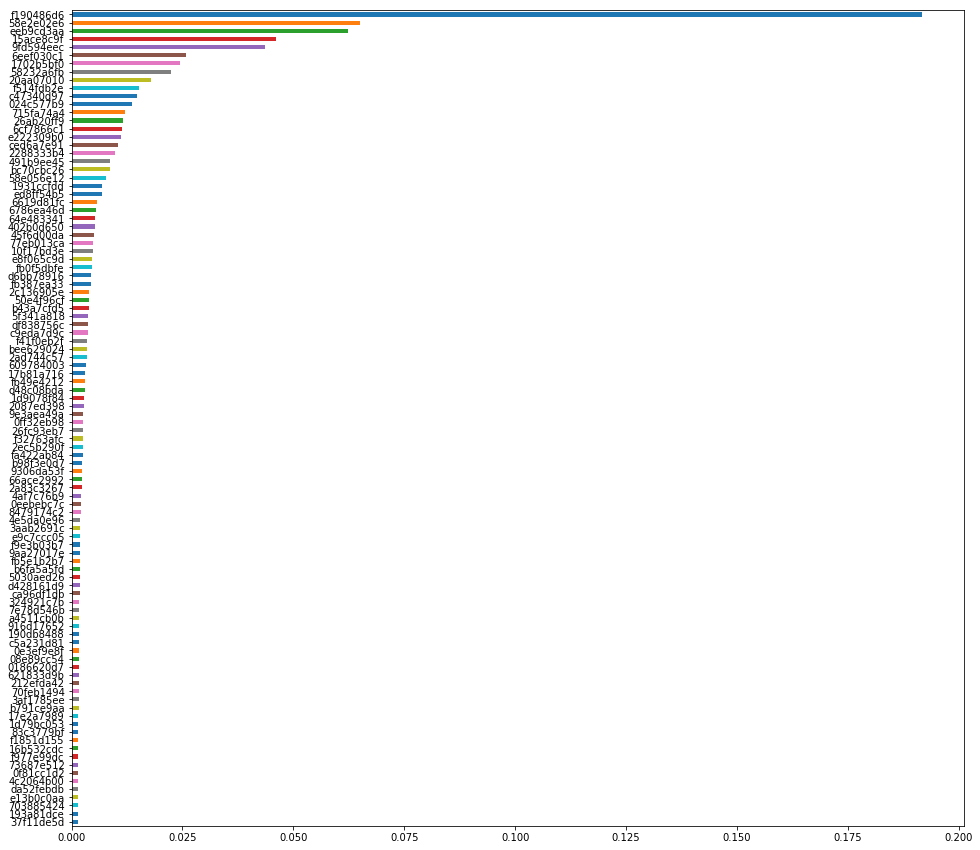

In [12]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf_gb.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.nlargest(100)
plt.figure(figsize=(16,15))
feat_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

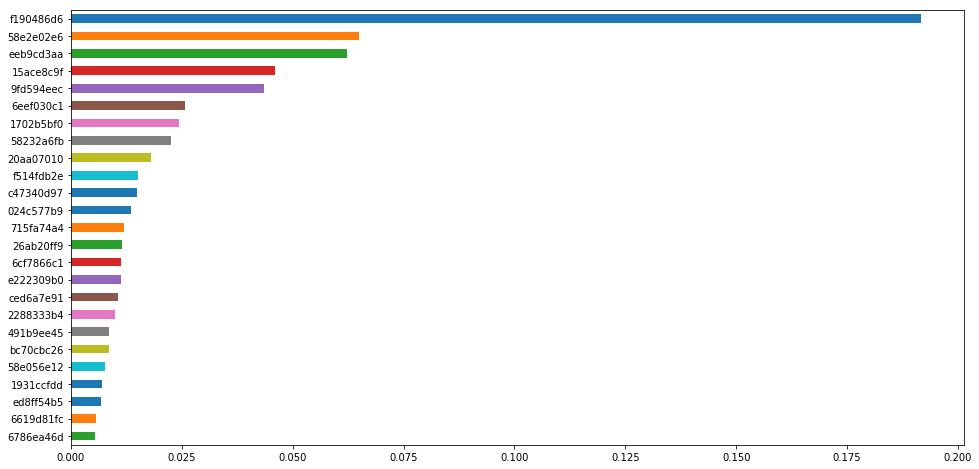

In [14]:
feat_importances_gb = pd.Series(clf_gb.feature_importances_, index=X_train.columns)
feat_importances_gb = feat_importances_gb.nlargest(25)
plt.figure(figsize=(16,8))
feat_importances_gb.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(random_state = 42)
clf_rf.fit(X_train, y_train)
print(clf_rf)

/Users/vinayrameshkangokar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [ ]:
# def evaluate(model, features, labels):
#     predictions = model.predict(features)
#     errors = abs(predictions - labels)
#     m = 100 * np.mean(errors / labels)
#     accuracy = 100 - m
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder()
# for column in train.columns:
#     train[column] = onehotencoder.fit_transform(train[column])
#     train[column] = train[column].reshape(1, -1)
#     print(train[column])
    
    
    
#     #print test       # Produces: [ 0.58  0.76]
# #print test.shape # Produces: (2,) meaning 2 rows, 1 col

# #test = test.reshape(1, -1)
# #print test       # Produces: [[ 0.58  0.76]]
# #print test.shape 


In [17]:
#  RF_target=np.expm1(clf_rf.predict(test))

ValueError: could not convert string to float: '000137c73'

In [ ]:
# feat_importances_rf = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
# feat_importances_rf = feat_importances_rf.nlargest(25)
# plt.figure(figsize=(16,8))
# feat_importances_rf.plot(kind='barh')
# plt.gca().invert_yaxis()
# plt.show()

Importing library and generating pairplot of Top 6 Important features.

/Users/vinayrameshkangokar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vinayrameshkangokar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Pairplot of Top 6 Important Features')

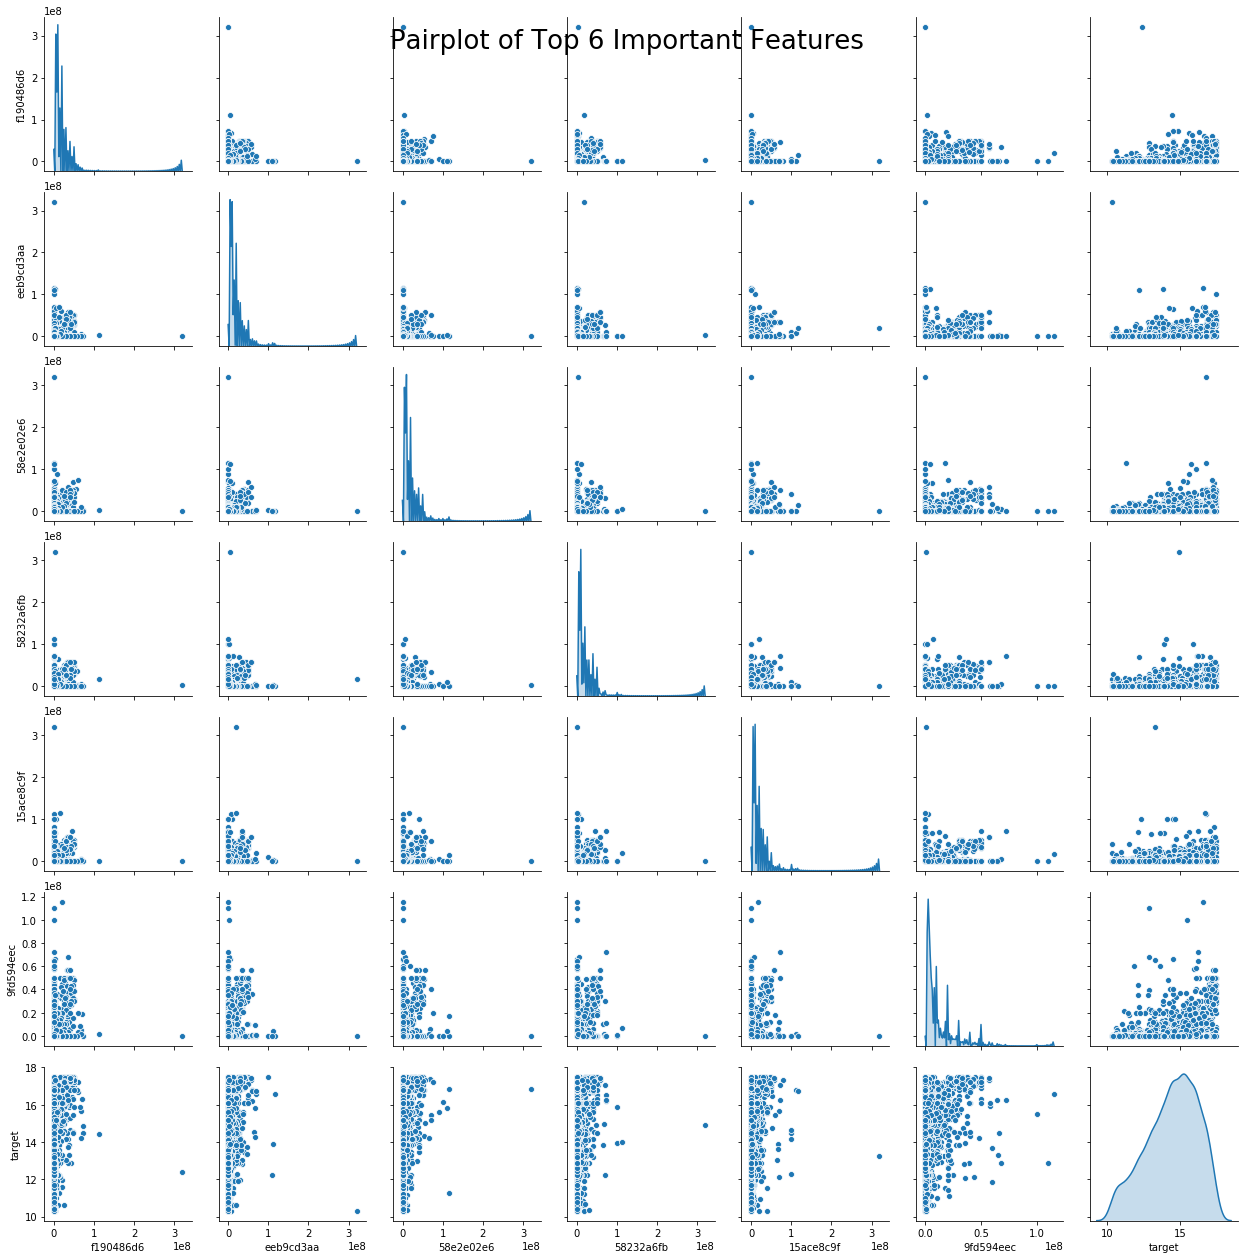

In [18]:
import seaborn as sns
df_plot = X_train[['f190486d6', 'eeb9cd3aa', '58e2e02e6', '58232a6fb', '15ace8c9f', '9fd594eec']]
df_plot['target'] = y_train

g = sns.pairplot(df_plot, diag_kind="kde", palette="BuGn_r")
g.fig.suptitle('Pairplot of Top 6 Important Features',fontsize=26)

In [19]:
s1 = pd.Series(clf_gb.feature_importances_, index=X_train.columns).nlargest(20).index
s2 = pd.Series(clf_rf.feature_importances_, index=X_train.columns).nlargest(20).index

common_features = pd.Series(list(set(s1).union(set(s2)))).values

print(common_features)

['6eef030c1' '994b4c2ac' 'eeb9cd3aa' 'c47340d97' 'f514fdb2e' '26ab20ff9'
 'e222309b0' 'f190486d6' '715fa74a4' '66ace2992' '58232a6fb' 'd48c08bda'
 '6786ea46d' '6cf7866c1' 'd6bb78916' '024c577b9' 'ced6a7e91' '58e2e02e6'
 '1702b5bf0' 'fb0f5dbfe' '491b9ee45' '9fd594eec' '15ace8c9f' '2288333b4'
 'bc70cbc26' '20aa07010' 'b43a7cfd5']


Generating correlation Heatmap.

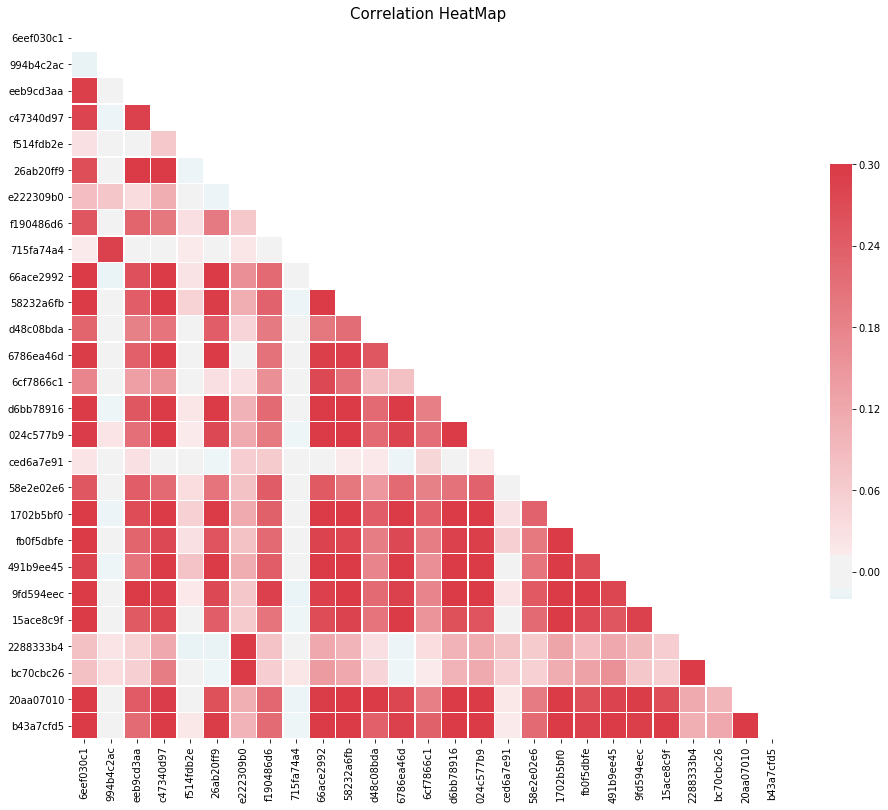

In [20]:
df_plot = pd.DataFrame(X_train, columns = common_features)
corr = df_plot.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation HeatMap", fontsize=15)
plt.show()

Build Test and Train data for modeling.

In [21]:
from sklearn.model_selection import train_test_split
dev_X, val_X, dev_y, val_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

LightGBM for predicting the target value. Light GBM is a gradient boosting framework that uses tree based learning algorithm. Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise.

In [22]:
from sklearn import model_selection
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 35,
        "learning_rate" : 0.005,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgval], 
                      early_stopping_rounds=500, 
                      verbose_eval=50, 
                      evals_result=evals_result)
    
    pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result

In [ ]:
# pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, X_test)
# print("LightGBM Training Completed...")

In [ ]:
# # feature importance
# print("Features Importance...")
# gain = model.feature_importance('gain')
# featureimp = pd.DataFrame({'feature':model.feature_name(), 
#                    'split':model.feature_importance('split'), 
#                    'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
# print(featureimp[:15])

In [ ]:
# def run_xgb(train_X, train_y, val_X, val_y, test_X):
#     print("############# Build XGBoost model #############")
#     model_xgb = xgb.XGBRegressor(colsample_bytree = 0.055, 
#                                  colsample_bylevel = 0.5, 
#                                  gamma = 1.5, 
#                                  learning_rate = 0.02, 
#                                  max_depth = 32, 
#                                  objective = 'reg:linear',
#                                  booster = 'gbtree',
#                                  min_child_weight = 57, 
#                                  n_estimators = 1000, 
#                                  reg_alpha = 0, 
#                                  reg_lambda = 0,
#                                  eval_metric = 'rmse', 
#                                  subsample = 0.7, 
#                                  silent = 1, 
#                                  n_jobs = -1, 
#                                  early_stopping_rounds = 14,
#                                  random_state = 7, 
#                                  nthread = -1)
    
#     print("Validating.....")
#     model_xgb.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_val, y_val)], eval_metric = 'rmse', 
#                   early_stopping_rounds = 100, verbose = True)
#     pred_test_y = np.expm1(model_xgb.predict(test_X))
#     print("XGBoost Training Completed...")
    
#     return pred_test_y
    

In [23]:
pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, X_test)
print("LightGBM Training Completed...")

Training until validation scores don't improve for 500 rounds.
[50]	valid_0's rmse: 1.62017
[100]	valid_0's rmse: 1.56234
[150]	valid_0's rmse: 1.52058
[200]	valid_0's rmse: 1.48788
[250]	valid_0's rmse: 1.46512
[300]	valid_0's rmse: 1.44849
[350]	valid_0's rmse: 1.4378
[400]	valid_0's rmse: 1.42859
[450]	valid_0's rmse: 1.4228
[500]	valid_0's rmse: 1.41805
[550]	valid_0's rmse: 1.41546
[600]	valid_0's rmse: 1.41371
[650]	valid_0's rmse: 1.41221
[700]	valid_0's rmse: 1.41143
[750]	valid_0's rmse: 1.41121
[800]	valid_0's rmse: 1.41114
[850]	valid_0's rmse: 1.41132
[900]	valid_0's rmse: 1.41121
[950]	valid_0's rmse: 1.41168
[1000]	valid_0's rmse: 1.41204
[1050]	valid_0's rmse: 1.41272
[1100]	valid_0's rmse: 1.41321
[1150]	valid_0's rmse: 1.41372
[1200]	valid_0's rmse: 1.41381
[1250]	valid_0's rmse: 1.41422
Early stopping, best iteration is:
[758]	valid_0's rmse: 1.41102
LightGBM Training Completed...


By using Lightgbm get the best rmse value: 1.41102

In [24]:
print("Features Importance...")
gain = model.feature_importance('gain')
featureimp = pd.DataFrame({'feature':model.feature_name(), 
                   'split':model.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(featureimp[:15])

Features Importance...
        feature  split      gain
4131  f190486d6    553  8.133881
2378  58e2e02e6    490  5.061176
3467  eeb9cd3aa    471  4.705095
4021  15ace8c9f    406  3.342218
2616  9fd594eec    254  3.197028
8     20aa07010    298  2.241847
834   6eef030c1    243  1.565158
3572  58232a6fb    276  1.406133
1459  b43a7cfd5    265  1.158444
3662  491b9ee45    222  1.136495
1484  024c577b9    203  1.107075
2689  fb0f5dbfe    292  1.062879
2082  58e056e12    250  0.893923
4344  1702b5bf0    206  0.864563
3792  ed8ff54b5    132  0.852862


In [ ]:
# sub=pd.read_csv('../input/sample_submission.csv')

# sub_rf = pd.DataFrame()
# sub_rf["target"] = RF_target
# sub_rf["ID"] = sub["ID"]
# sub_rf.to_csv("sub_rf.csv", index=False)

# sub_lgb = pd.DataFrame()
# sub_lgb["target"] = lgb_pred
# sub_lgb["ID"] = sub["ID"]
# sub_lgb.to_csv("sub_lgb.csv", index=False)


# sub["target"] = (sub_lgb["target"] + sub_rf['target'] )/2

# print(sub.head())
# sub.to_csv('sub_lgb_xgb.csv', index=False)
# sub.head()

In [ ]:
# # feature importance
# print("Features Importance...")
# gain = model.feature_importance('gain')
# featureimp = pd.DataFrame({'feature':model.feature_name(), 
#                    'split':model.feature_importance('split'), 
#                    'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
# print(featureimp[:15])

In [ ]:
# def run_xgb(dev_X, dev_y, val_X, val_y, X_test):
#     params = {'objective': 'reg:linear', 
#           'eval_metric': 'rmse',
#           'eta': 0.001,
#           'max_depth': 10, 
#           'subsample': 0.6, 
#           'colsample_bytree': 0.6,
#           'alpha':0.001,
#           'random_state': 42, 
#           'silent': True}
    
#     tr_data = xgb.DMatrix(train_X, train_y)
#     va_data = xgb.DMatrix(val_X, val_y)
    
#     watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
#     model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 100, verbose_eval=100)
    
#     dtest = xgb.DMatrix(test_X)
#     xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    
#     return xgb_pred_y, model_xgb

In [ ]:
# pred_test, model, evals_result = run_xgb(dev_X, dev_y, val_X, val_y, X_test)
# print("xgboost Training Completed...")

XGB modeling to find the Target column. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

In [25]:
import xgboost as xgb
def run_xgb(train_X, train_y, val_X, val_y, test_X):
    params = {'objective': 'reg:linear', 
          'eval_metric': 'rmse',
          'eta': 0.005,
          'max_depth': 15, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
    
    tr_data = xgb.DMatrix(train_X, train_y)
    va_data = xgb.DMatrix(val_X, val_y)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 30, verbose_eval=100)
    
    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    
    return xgb_pred_y, model_xgb


In [26]:
# Training XGB
pred_test_xgb, model_xgb = run_xgb(dev_X, dev_y, val_X, val_y, X_test)
print("XGB Training Completed...")

[0]	train-rmse:14.0323	valid-rmse:14.0214
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 30 rounds.
[100]	train-rmse:8.60634	valid-rmse:8.59345
[200]	train-rmse:5.35704	valid-rmse:5.36571
[300]	train-rmse:3.41518	valid-rmse:3.4792
[400]	train-rmse:2.26343	valid-rmse:2.42073
[500]	train-rmse:1.59821	valid-rmse:1.87088
[600]	train-rmse:1.22801	valid-rmse:1.61336
[700]	train-rmse:1.02711	valid-rmse:1.50194
[800]	train-rmse:0.918252	valid-rmse:1.45637
[900]	train-rmse:0.856516	valid-rmse:1.43843
[1000]	train-rmse:0.818941	valid-rmse:1.43129
[1100]	train-rmse:0.791075	valid-rmse:1.42827
[1200]	train-rmse:0.766836	valid-rmse:1.42649
[1300]	train-rmse:0.746883	valid-rmse:1.42531
[1400]	train-rmse:0.728188	valid-rmse:1.42443
[1500]	train-rmse:0.709787	valid-rmse:1.42329
[1600]	train-rmse:0.693605	valid-rmse:1.42267
Stopping. Best iteration:
[1572]	train-rmse:0.698151	valid-rmse:1.42257

XGB Training Complete

In [ ]:
# sub = pd.read_csv('../input/sample_submission.csv')
# sub["target"] = pred_test
# print(sub.head())
# sub.to_csv('sub_lgb.csv', index=False)

Combining predictions from both LightGBM and xgBoost model.

In [28]:
sub = pd.read_csv('sample_submission.csv')

sub_lgb = pd.DataFrame()
sub_lgb["target"] = pred_test

sub_xgb = pd.DataFrame()
sub_xgb["target"] = pred_test_xgb

sub["target"] = (sub_lgb["target"] + sub_xgb["target"])/2

Generating .CSV file for submission.

In [29]:
print(sub.head())
sub.to_csv('sub_lgb_xgb.csv', index=False)

          ID        target
0  000137c73  2.043448e+06
1  00021489f  1.719654e+06
2  0004d7953  3.094869e+06
3  00056a333  5.827093e+06
4  00056d8eb  1.860647e+06


# Summary

In my kernel, I have used both lightgbm and xgboost to predict the Target column. Removed NaN values from the train and test dataframe. Also, removed the constant and duplicate values from the train and test dataframe to get better results. Combined the predictions from both of the algorithms and genearted the output as .csv file.

**CONCLUSION**

From the above observations we can infer that:

###### By using Lightgbm got the rmse value as 1.41102
###### By using XGboost got the rmse value as 1.42257

Getting better result from lightgbm algorithm than xgboost algorithm. Lastly, combining the predictions of both the algorithms and generating the output .csv file.

**CONTRIBUTION STATEMENT**

60% of code from online resources 40% of code by me.

**CITATIONS**

Kaggle: https://www.kaggle.com/ 
Wikipedia: https://en.wikipedia.org/ 
StackOverflow: https://stackoverflow.com/
Github: https://github.com/nikbearbrown/INFO_6105
classroom.github.com/assignment-invitations/a1008a519017ca80da27fb845ab72818/success
Kaggle Kernel: https://www.kaggle.com/aditya1702/adversarial-val-lgbm-xgb-model-lb-1-40
https://www.kaggle.com/samratp/lightgbm-xgboost-catboost

**LICENSE**

Copyright 2019 FNU KARAN
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE